In [1]:
import mysql.connector as mariadb
import pandas as pd
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession.builder.appName('Data Analysis and Visualization').getOrCreate()

In [3]:
# Find and plot the percentage of applications approved for self-employed applicants.
# Note: Take a screenshot of the graph. 

sqlQuery = "(SELECT Self_Employed, (round(count(Application_Status)/(SELECT COUNT(Application_ID) \
  FROM cdw_sapp_loan_application \
    WHERE Application_Status = 'Y')*100, 2) ) as Percent \
      FROM cdw_sapp_loan_application \
    WHERE Application_Status = 'Y' \
    GROUP BY Self_Employed, Application_Status) as A"

sp_sqlQuery = spark.read.format("jdbc") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("user", "root") \
  .option("password", "password") \
  .option("dbtable", sqlQuery) \
  .load()

sp_sqlQuery.show()

+-------------+-------+
|Self_Employed|Percent|
+-------------+-------+
|           No|  86.74|
|          Yes|  13.26|
+-------------+-------+



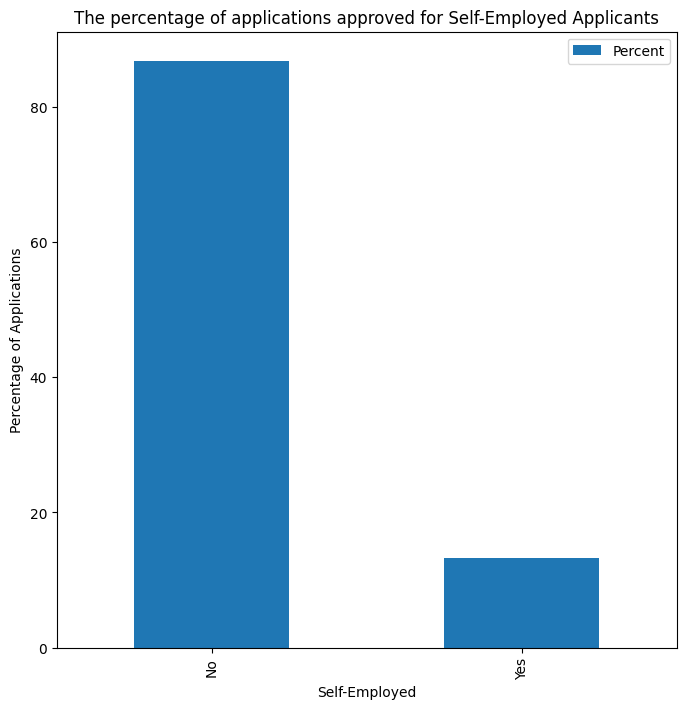

In [4]:
sql_df = sp_sqlQuery.toPandas()
sql_df['Percent'] = sql_df['Percent'].astype('float')

sql_df.plot(kind='bar', x='Self_Employed', y='Percent', figsize=(8,8))
plt.title('The percentage of applications approved for Self-Employed Applicants')
plt.xlabel('Self-Employed')
plt.ylabel('Percentage of Applications')
plt.show()

In [3]:
# Find the percentage of rejection for married male applicants. Note: Take a screenshot of the graph.

sqlQuery1 = "(SELECT Married, (round(count(Application_Status)/(SELECT COUNT(Application_ID) \
    FROM cdw_sapp_loan_application \
        WHERE Application_Status = 'N')*100, 2) ) as Percent \
            FROM cdw_sapp_loan_application \
        WHERE Application_Status = 'N' AND Gender = 'Male' \
            GROUP BY Married) as B"

sp_sqlQuery1 = spark.read.format("jdbc") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("user", "root") \
  .option("password", "password") \
  .option("dbtable", sqlQuery1) \
  .load()

sp_sqlQuery1.show()

+-------+-------+
|Married|Percent|
+-------+-------+
|     No|  26.22|
|    Yes|  53.05|
+-------+-------+



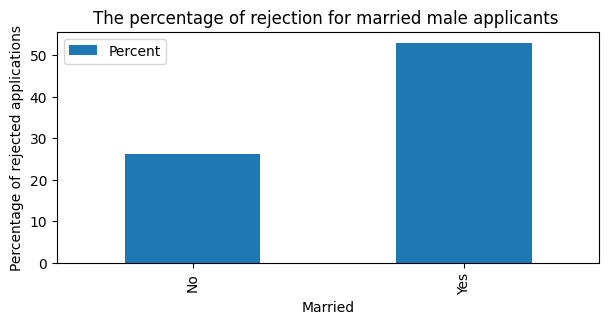

In [4]:
sql_df1 = sp_sqlQuery1.toPandas()
sql_df1['Percent'] = sql_df1['Percent'].astype('float')

sql_df1.plot(kind='bar', x='Married', y='Percent', figsize=(7,3))
plt.title('The percentage of rejection for married male applicants ')
plt.xlabel('Married')
plt.ylabel('Percentage of rejected applications')
plt.show()

In [7]:
# Find and plot the top three months with the largest transaction data. Note: Take a screenshot of the graph

sqlQuery2 = "(SELECT MONTH(STR_TO_DATE(TIMEID, '%Y%m%d')) AS Month, \
    ROUND(SUM(TRANSACTION_VALUE), 2) AS Total \
        FROM cdw_sapp_credit_card \
            GROUP BY Month \
            ORDER BY Total DESC LIMIT 3) as C"

sp_sqlQuery2 = spark.read.format("jdbc") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("user", "root") \
  .option("password", "password") \
  .option("dbtable", sqlQuery2) \
  .load()

sp_sqlQuery2.show()

+-----+---------+
|Month|    Total|
+-----+---------+
|   10|202583.89|
|    5|201310.26|
|   12|201251.08|
+-----+---------+



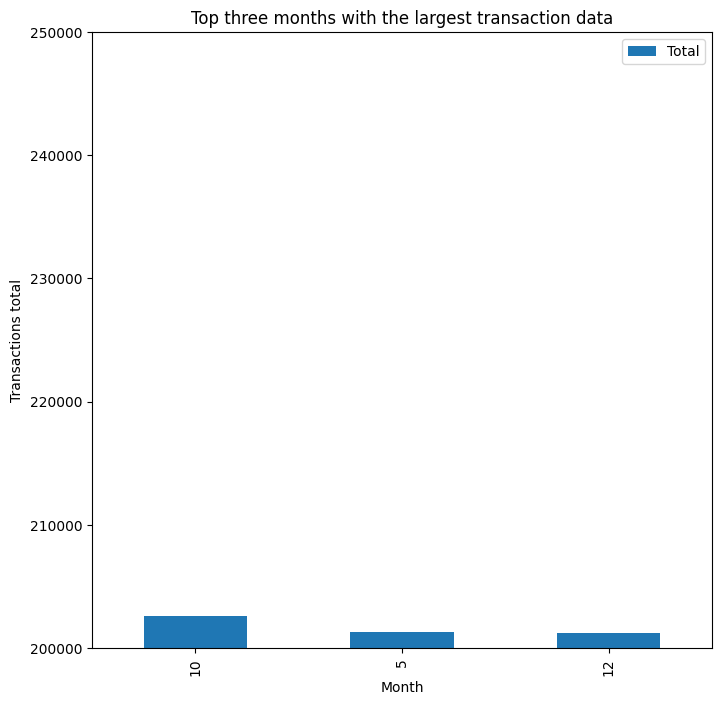

In [8]:
sql_df2 = sp_sqlQuery2.toPandas()
sql_df2.plot(kind='bar', x='Month', y='Total', figsize=(8,8), ylim=[200000, 250000])
plt.title('Top three months with the largest transaction data')
plt.xlabel('Month')
plt.ylabel('Transactions total')
plt.show()

In [9]:
# Find and plot which branch processed the highest total dollar value of healthcare transactions.
# Note: Take a screenshot of the graph. 

sqlQuery3 = "(SELECT branch.BRANCH_CODE, ROUND(SUM(tran.TRANSACTION_VALUE), 2) AS Total \
    FROM cdw_sapp_credit_card tran \
	INNER JOIN cdw_sapp_branch branch \
        ON tran.BRANCH_CODE = branch.BRANCH_CODE \
    WHERE tran.TRANSACTION_TYPE = 'Healthcare' \
    GROUP BY BRANCH_CODE \
    ORDER BY Total DESC LIMIT 1) AS D"

sp_sqlQuery3 = spark.read.format("jdbc") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("user", "root") \
  .option("password", "password") \
  .option("dbtable", sqlQuery3) \
  .load()

sp_sqlQuery3.show()

+-----------+-------+
|BRANCH_CODE|  Total|
+-----------+-------+
|         25|4370.18|
+-----------+-------+



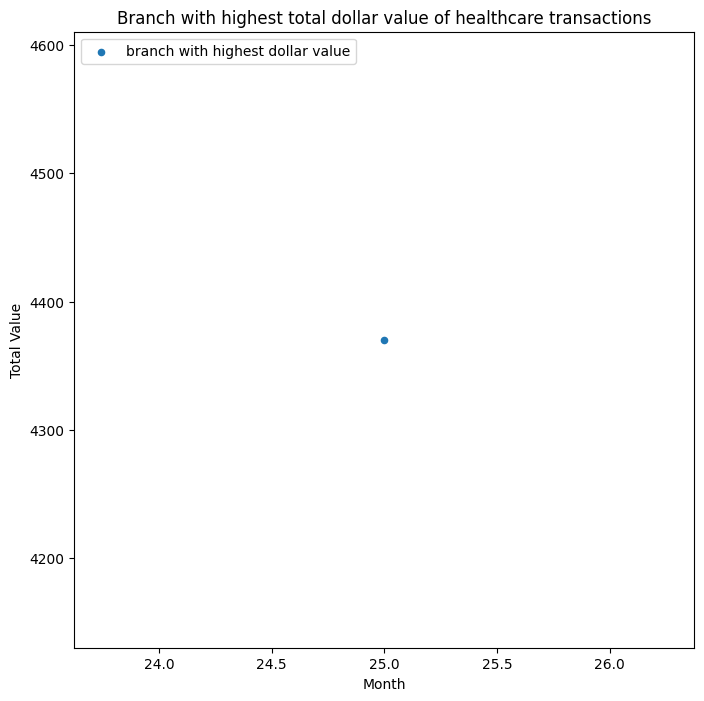

In [10]:
sql_df3 = sp_sqlQuery3.toPandas()
sql_df3.plot(kind='scatter', x='BRANCH_CODE', y='Total', figsize=(8,8))
plt.title('Branch with highest total dollar value of healthcare transactions')
plt.xlabel('Month')
plt.ylabel('Total Value')
plt.legend(['branch with highest dollar value'], loc='upper left')
plt.show()